
**Reading the Iris data into a Pandas dataframe**

In [ ]:
import os
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

df.tail()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


**Plotting the Iris data**

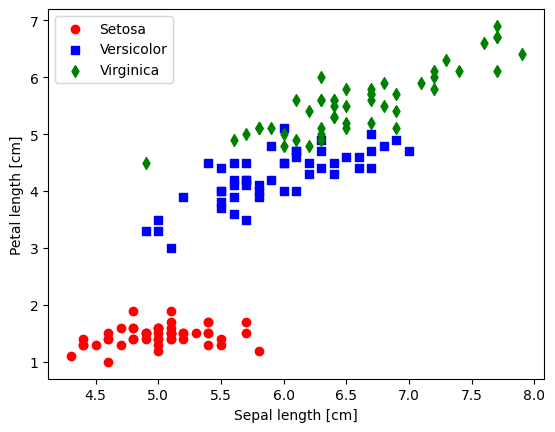

In [ ]:
import matplotlib.pyplot as plt

# select setosa, versicolor and virginica
ys = df.iloc[0:150, 4].values

# extract sepal length and petal length
Xs = df.iloc[0:150, [0, 2]].values

# plot data
plt.scatter(Xs[:50, 0], Xs[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(Xs[50:100, 0], Xs[50:100, 1],
            color='blue', marker='s', label='Versicolor')
plt.scatter(Xs[100:150, 0], Xs[100:150, 1],
            color='green', marker='d', label='Virginica')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
#plt.axis('equal')

plt.show()

**Implementing the perceptron learning algorithm**

In [ ]:
import numpy as np

# The percetropn class

class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    n_iter : int
      Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, n_iter=50):
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self.w_ = [np.float_(0.)] * X.shape[1]
        self.b_ = np.float_(0.)
        self.updates_ = []
        self.errors_ = []

        for _ in range(self.n_iter):
            updates = 0
            for xi, target in zip(X, y):
                updates += int(target != self.predict(xi))
                prediction_error = target - self.predict(xi)
                self.w_ += prediction_error * xi
                self.b_ += prediction_error
            self.updates_.append(updates)
            errors = 0
            for xi, target in zip(X, y):
                errors += int(target != self.predict(xi))
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

**Plotting the decision regions**

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')


**Classifying setosa and versicolor**

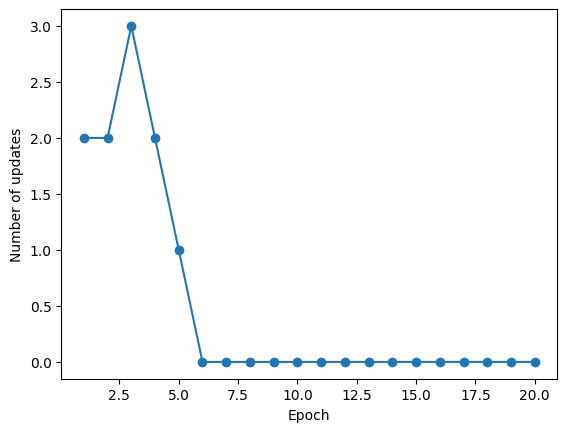

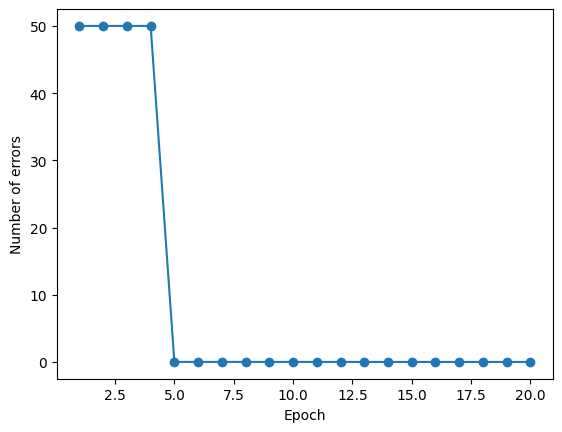

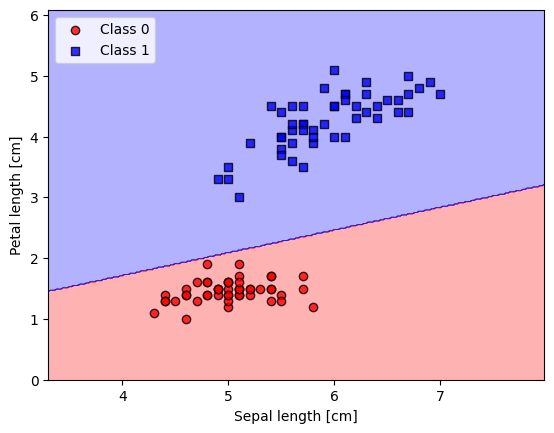

In [ ]:
# Select setosa and versicolor
X = np.concatenate((Xs[0:50,:2],Xs[50:100,:2]), axis=0)
y = np.concatenate((ys[0:50],ys[50:100]), axis=0)
y = np.where(y == 'Iris-setosa', 0, 1)

# Train an Adaline using the setosa and versicolor data
ppn1 = Perceptron(n_iter=20)
ppn1.fit(X, y)

# Plot the number of updates
plt.plot(range(1, len(ppn1.updates_) + 1), ppn1.updates_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of updates')
plt.show()

# Plot the number of errors
plt.plot(range(1, len(ppn1.errors_) + 1), ppn1.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of errors')
plt.show()

# Plot the decision regions
plot_decision_regions(X, y, ppn1)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

**Exercise 1**


---


The setosa and virginica perceptron converges after the first four epochs (no updates on the fifth); the versicolor and virginica perceptron does not converge and will update on every epoch. This difference is because the setosa and virginica data sets are linearly seperable while the versicolor and virginica training data sets are not linearly seperable. The perceptron algorithm converges when the current weight vector correctly predicts all training examples. Since the versicolor and virginica data sets are not linearly seperable and the decision boundary of a perceptron is a hyperplane (line in our case), there will always be errors and the perceptron will continue to update.

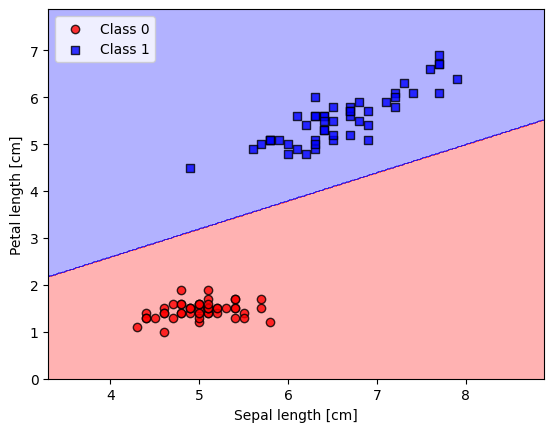

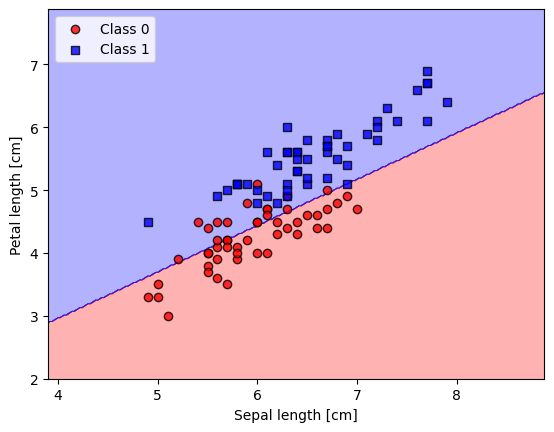

In [ ]:
# Select setosa and virginica
X = np.concatenate((Xs[0:50,:2],Xs[100:150,:2]), axis=0)
y = np.concatenate((ys[0:50],ys[100:150]), axis=0)
y = np.where(y == 'Iris-setosa', 0, 1)

# Train an Adaline using the setosa and virginica data
ppn2 = Perceptron(n_iter=20)
ppn2.fit(X, y)

# Plot the decision regions
plot_decision_regions(X, y, ppn2)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Select versicolor and virginica
X = np.concatenate((Xs[50:100,:2],Xs[100:150,:2]), axis=0)
y = np.concatenate((ys[50:100],ys[100:150]), axis=0)
y = np.where(y == 'Iris-versicolor', 0, 1)

# Train an Adaline using the versicolor and virginica data
ppn3 = Perceptron(n_iter=70)
ppn3.fit(X, y)

# Plot the decision regions
plot_decision_regions(X, y, ppn3)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

**Exercise 2**

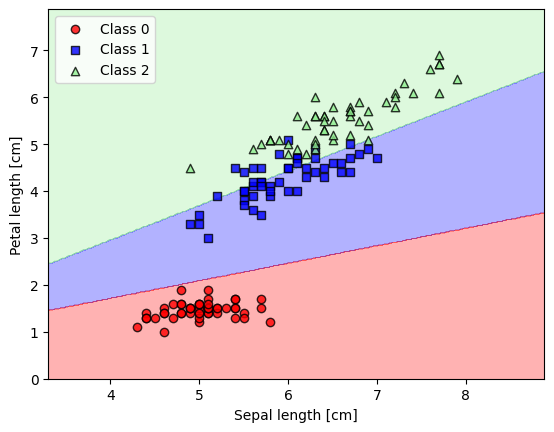

The error rate is 0.1067


In [ ]:
from itertools import combinations

class All_Pairs:
  def __init__(self, perceptrons):
    self.perceptrons = perceptrons

    #n: number of classes
    #given nCr = # of perceptrons and r = 2
    self.n = int(np.roots([1, -1, -2*len(perceptrons)])[0])

    #make list of all possible combinations
    self.combinations = list(combinations(range(self.n), 2))
    if(len(self.perceptrons) != len(self.combinations)):
      raise Exception("Number of perceptrons ({}) does not match number of combination ({})".format(len(self.perceptrons), len(self.combinations)))

  def predict(self, X):
    #make predictions for each perceptron
    predictions = [perceptron.predict(X) for perceptron in self.perceptrons]

    yn = list()

    #loop over each data point
    for x in range(len(predictions[0])):
      #each votes index corresponds to one class
      votes = np.zeros(self.n)
      #loop over each perceptron
      for p in range(len(predictions)):
        #take prediction of perceptron p for data x
        prediction = predictions[p][x]
        #each perceptron corresponds to one combination set
        combination = self.combinations[p]
        #increment class vote based on prediction
        votes[combination[0 if prediction == 0 else 1]] += 1
      #take index of max votes, if tied take first occurance
      yn.append(np.argmax(votes))
    return np.array(yn)

  def get_error_rate(self, X, y):
    #error rate = number of errors / total number of predictions
    return sum(self.predict(X) != y)/len(y)

#convert to numerical classification
y = np.where(ys == 'Iris-setosa', 0, np.where(ys == 'Iris-versicolor', 1, 2))

#instantiate all-pairs object with three perceptrons
ap = All_Pairs([ppn1, ppn2, ppn3])

# Plot the decision regions
plot_decision_regions(Xs, y, ap)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

#print error rate
print(f"The error rate is {ap.get_error_rate(Xs, y):.4f}")